In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv('datasetTugasAkhir.csv')
dataset.head()

,luas_panen,bibit,pupuk_npk,pupuk_urea,obat_insectisida,obat_nutrisil_campuran,hasil_panen
0,6724.0,1,2,1,5,10,33444.0
1,4818.0,2,1,2,10,15,24201.0
2,3395.0,1,2,2,10,20,17846.0
3,2515.0,1,1,1,10,15,14095.0
4,2122.0,1,2,2,5,20,12782.0


In [3]:
dataset.drop(columns=['obat_nutrisil_campuran'], inplace=True)
dataset.head()

,luas_panen,bibit,pupuk_npk,pupuk_urea,obat_insectisida,hasil_panen
0,6724.0,1,2,1,5,33444.0
1,4818.0,2,1,2,10,24201.0
2,3395.0,1,2,2,10,17846.0
3,2515.0,1,1,1,10,14095.0
4,2122.0,1,2,2,5,12782.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   luas_panen        1300 non-null   float64
 1   bibit             1300 non-null   int64  
 2   pupuk_npk         1300 non-null   int64  
 3   pupuk_urea        1300 non-null   int64  
 4   obat_insectisida  1300 non-null   int64  
 5   hasil_panen       1300 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 61.1 KB


In [5]:
dataset.isnull().sum()

luas_panen          0
bibit               0
pupuk_npk           0
pupuk_urea          0
obat_insectisida    0
hasil_panen         0
dtype: int64

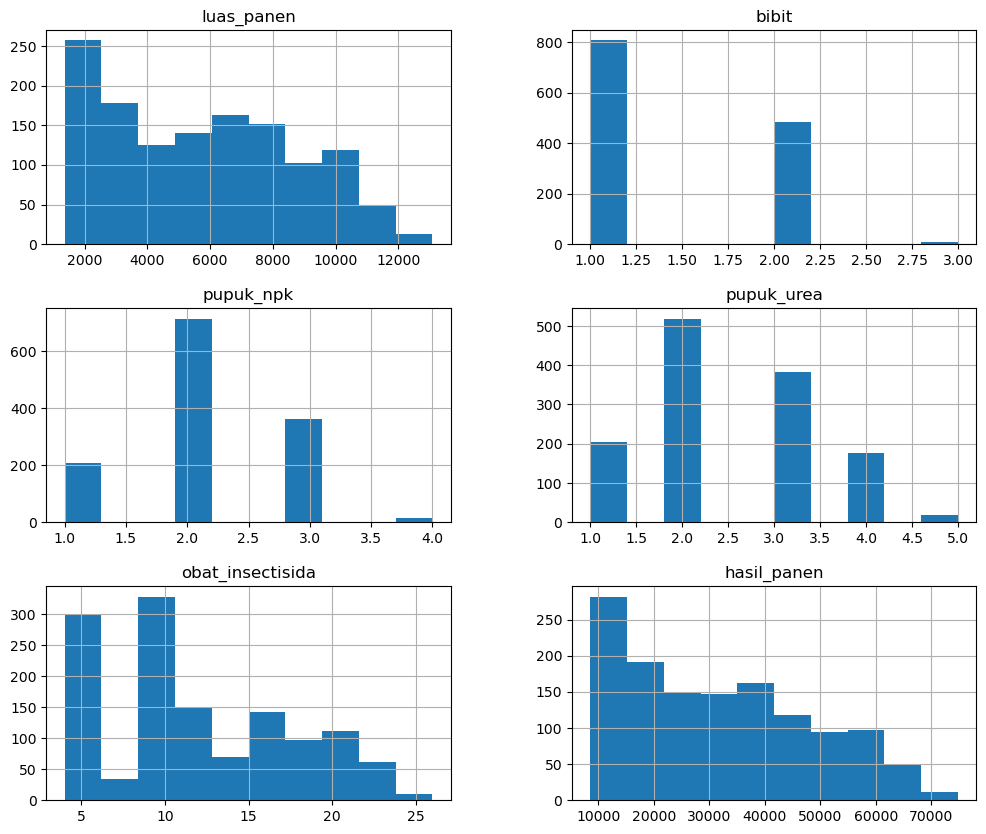

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

dataset.hist(figsize=(12, 10))
plt.show()

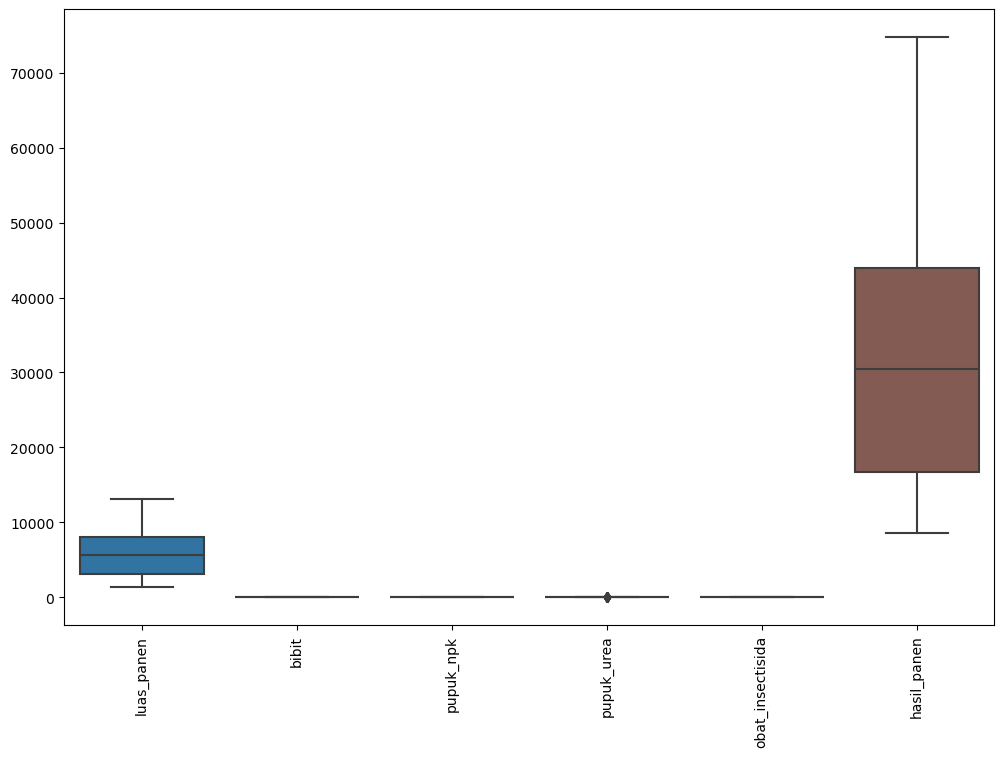

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset)
plt.xticks(rotation=90)
plt.show()

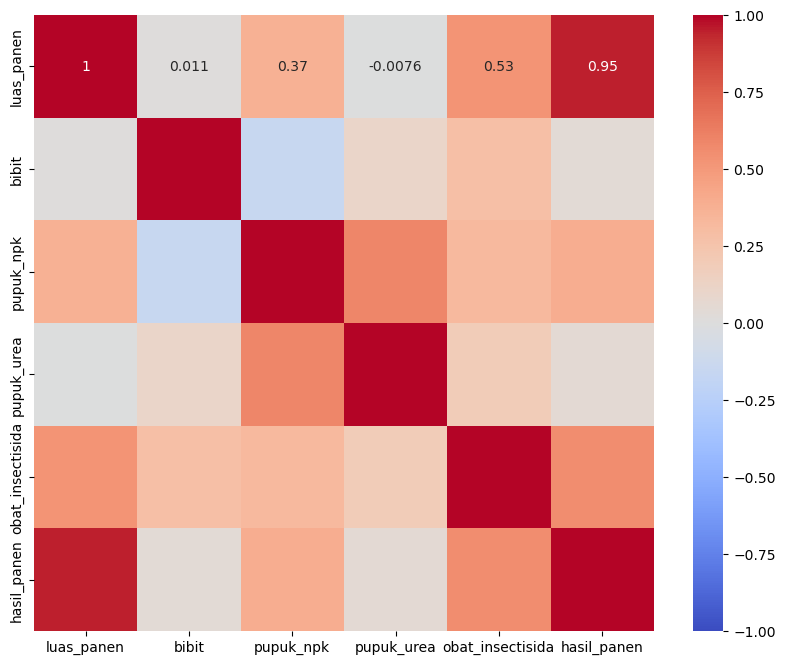

In [8]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [9]:
X = dataset.drop(['hasil_panen'], axis = 1)
y = dataset['hasil_panen']

In [10]:
X

,luas_panen,bibit,pupuk_npk,pupuk_urea,obat_insectisida
0,6724.0,1,2,1,5
1,4818.0,2,1,2,10
2,3395.0,1,2,2,10
3,2515.0,1,1,1,10
4,2122.0,1,2,2,5
...,...,...,...,...,...
1295,10706.0,1,3,3,22
1296,7358.0,1,3,3,9
1297,5925.0,3,2,2,18
1298,9607.0,1,3,4,17


In [11]:
y

0       33444.0
1       24201.0
2       17846.0
3       14095.0
4       12782.0
         ...   
1295    56591.0
1296    43396.0
1297    39149.0
1298    46919.0
1299    48131.0
Name: hasil_panen, Length: 1300, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestRegressor(random_state=42)

# Mencari Parameter Menggunakan GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [17]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params_grid = grid_search.best_params_
print(best_params_grid)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [18]:
# Prediksi menggunakan model terbaik dari Grid Search
best_grid = grid_search.best_estimator_
y_pred_grid = best_grid.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_grid)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3047.9171460950247


In [20]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_grid})

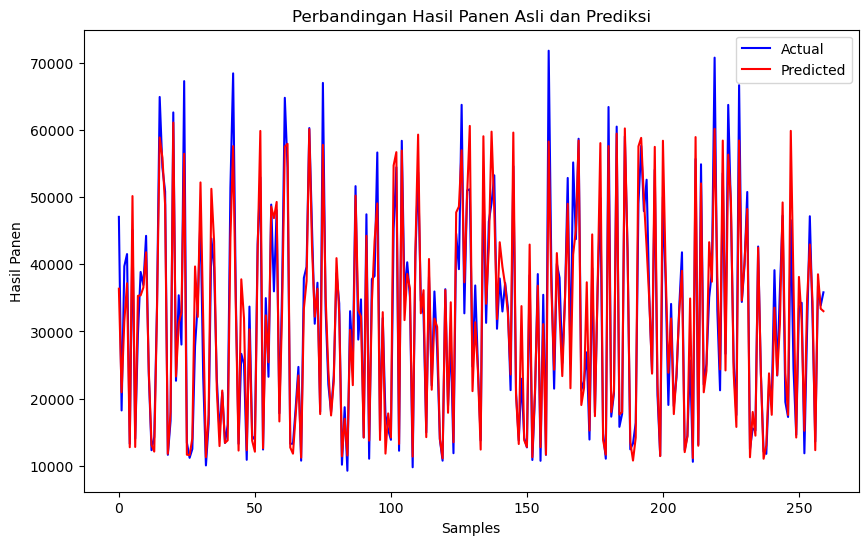

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', color='b')
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='r')
plt.xlabel('Samples')
plt.ylabel('Hasil Panen')
plt.title('Perbandingan Hasil Panen Asli dan Prediksi')
plt.legend()
plt.show()

# Mencari Parameter Menggunakan Random Search

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [24]:
#parameter untuk random search
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
}

In [25]:
# Random Search
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)
best_params_random = random_search.best_params_
print(best_params_random)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 183}


In [26]:
# Prediksi menggunakan model terbaik dari Random Search
best_random = random_search.best_estimator_
y_pred_random = best_random.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_random)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3044.2651097918133


In [28]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_random})

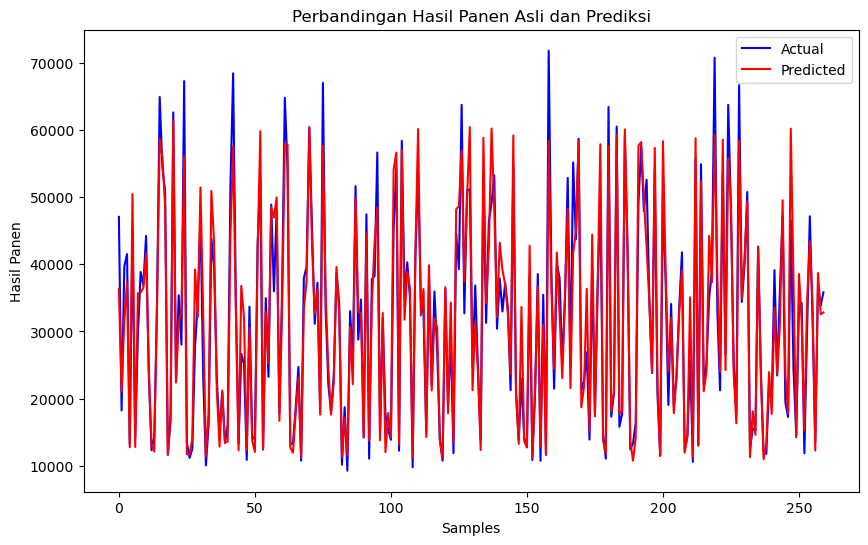

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', color='b')
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='r')
plt.xlabel('Samples')
plt.ylabel('Hasil Panen')
plt.title('Perbandingan Hasil Panen Asli dan Prediksi')
plt.legend()
plt.show()

# Mencari Parameter Manual

In [31]:
# Manual parameters
manual_params = {
    'n_estimators': 150,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

In [32]:
model_manual = RandomForestRegressor(**manual_params, random_state=42)
model_manual.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)

In [33]:
# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

In [34]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3140.2947785538154


In [35]:
# Manual parameters
manual_params1 = {
    'n_estimators': 110,
    'max_depth': 17,
    'min_samples_split': 2,
    'min_samples_leaf': 4
}

In [36]:
model_manual = RandomForestRegressor(**manual_params1, random_state=42)
model_manual.fit(X_train, y_train)

RandomForestRegressor(max_depth=17, min_samples_leaf=4, n_estimators=110,
                      random_state=42)

In [37]:
# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

In [38]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3062.099418854269


In [39]:
manual_params2 = {
    'n_estimators': 186,
    'max_depth': 16,
    'min_samples_split': 7,
    'min_samples_leaf': 8
}

In [40]:
model_manual = RandomForestRegressor(**manual_params2, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2993.4397417841997


In [41]:
manual_params3 = {
    'n_estimators': 159,
    'max_depth': 15,
    'min_samples_split': 2,
    'min_samples_leaf': 8
}

In [42]:
model_manual = RandomForestRegressor(**manual_params3, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2995.2689307172486


In [43]:
manual_params4 = {
    'n_estimators': 191,
    'max_depth': 18,
    'min_samples_split': 3,
    'min_samples_leaf': 5
}

In [44]:
model_manual = RandomForestRegressor(**manual_params4, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3036.407430727233


In [45]:
manual_params5 = {
    'n_estimators': 63,
    'max_depth': 13,
    'min_samples_split': 8,
    'min_samples_leaf': 4
}

In [46]:
model_manual = RandomForestRegressor(**manual_params5, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3053.5108449711656


In [47]:
manual_params6 = {
    'n_estimators': 148,
    'max_depth': 12,
    'min_samples_split': 3,
    'min_samples_leaf': 8
}

In [48]:
model_manual = RandomForestRegressor(**manual_params6, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2991.408726388019


In [49]:
manual_params7 = {
    'n_estimators': 163,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

In [50]:
model_manual = RandomForestRegressor(**manual_params7, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3210.811512819923


In [51]:
manual_params8 = {
    'n_estimators': 147,
    'max_depth': 15,
    'min_samples_split': 8,
    'min_samples_leaf': 4
}

In [52]:
model_manual = RandomForestRegressor(**manual_params8, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3049.8487658910954


In [53]:
manual_params9 = {
    'n_estimators': 82,
    'max_depth': 14,
    'min_samples_split': 8,
    'min_samples_leaf': 7
}

In [54]:
model_manual = RandomForestRegressor(**manual_params9, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3010.6957900057005


In [55]:
manual_params10 = {
    'n_estimators': 174,
    'max_depth': 6,
    'min_samples_split': 7,
    'min_samples_leaf': 2
}

In [56]:
model_manual = RandomForestRegressor(**manual_params10, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2889.109655147695


In [57]:
manual_params11 = {
    'n_estimators': 192,
    'max_depth': 7,
    'min_samples_split': 7,
    'min_samples_leaf': 3
}

In [58]:
model_manual = RandomForestRegressor(**manual_params11, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2936.445128873869


In [59]:
manual_params12 = {
    'n_estimators': 162,
    'max_depth': 15,
    'min_samples_split': 6,
    'min_samples_leaf': 7
}

In [60]:
model_manual = RandomForestRegressor(**manual_params12, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3006.6116913171145


In [61]:
manual_params13 = {
    'n_estimators': 80,
    'max_depth': 13,
    'min_samples_split': 7,
    'min_samples_leaf': 7
}

In [62]:
model_manual = RandomForestRegressor(**manual_params13, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3012.0620393328136


In [63]:
manual_params14 = {
    'n_estimators': 158,
    'max_depth': 6,
    'min_samples_split': 9,
    'min_samples_leaf': 6
}

In [64]:
model_manual = RandomForestRegressor(**manual_params14, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2939.3184556290803


In [65]:
manual_params15 = {
    'n_estimators': 72,
    'max_depth': 19,
    'min_samples_split': 4,
    'min_samples_leaf': 7
}

In [66]:
model_manual = RandomForestRegressor(**manual_params15, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3017.4575124958255


In [67]:
manual_params16 = {
    'n_estimators': 117,
    'max_depth': 18,
    'min_samples_split': 3,
    'min_samples_leaf': 5
}

In [68]:
model_manual = RandomForestRegressor(**manual_params16, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3039.1037475440435


In [69]:
manual_params17 = {
    'n_estimators': 85,
    'max_depth': 7,
    'min_samples_split': 5,
    'min_samples_leaf': 8
}

In [70]:
model_manual = RandomForestRegressor(**manual_params17, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2977.0812411691845


In [71]:
manual_params18 = {
    'n_estimators': 142,
    'max_depth': 10,
    'min_samples_split': 3,
    'min_samples_leaf': 5
}

In [72]:
model_manual = RandomForestRegressor(**manual_params18, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3021.3787588432674


In [73]:
manual_params19 = {
    'n_estimators': 88,
    'max_depth': 5,
    'min_samples_split': 8,
    'min_samples_leaf': 1
}

In [74]:
model_manual = RandomForestRegressor(**manual_params19, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2861.858298974972


In [75]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_manual})

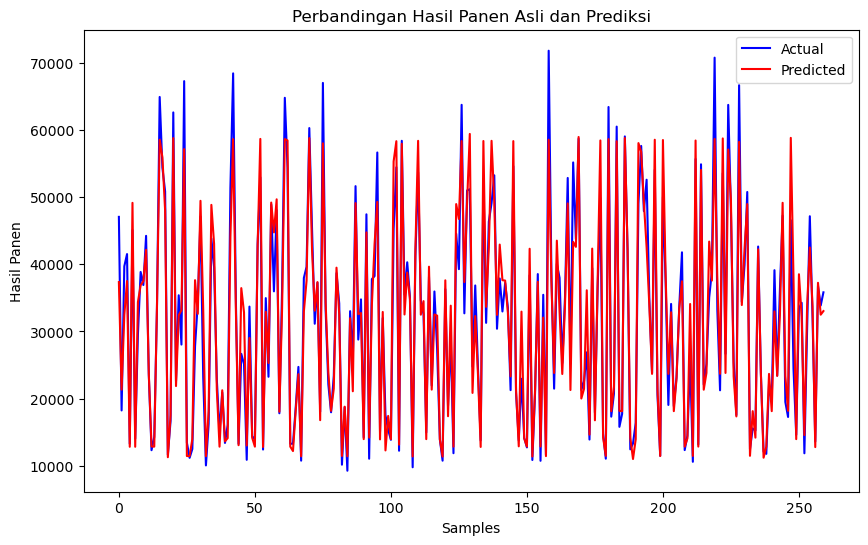

In [76]:
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual', color='b')
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='r')
plt.xlabel('Samples')
plt.ylabel('Hasil Panen')
plt.title('Perbandingan Hasil Panen Asli dan Prediksi')
plt.legend()
plt.show()

In [77]:
manual_params20 = {
    'n_estimators': 56,
    'max_depth': 12,
    'min_samples_split': 7,
    'min_samples_leaf': 7
}

In [78]:
model_manual = RandomForestRegressor(**manual_params20, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3020.588831254285


In [79]:
manual_params21 = {
    'n_estimators': 178,
    'max_depth': 13,
    'min_samples_split': 3,
    'min_samples_leaf': 8
}

In [80]:
model_manual = RandomForestRegressor(**manual_params21, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2992.8728277235296


In [81]:
manual_params22 = {
    'n_estimators': 106,
    'max_depth': 11,
    'min_samples_split': 3,
    'min_samples_leaf': 6
}

In [82]:
model_manual = RandomForestRegressor(**manual_params22, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3024.4543237721423


In [83]:
manual_params23 = {
    'n_estimators': 109,
    'max_depth': 6,
    'min_samples_split': 6,
    'min_samples_leaf': 1
}

In [84]:
model_manual = RandomForestRegressor(**manual_params23, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2906.73467273112


In [85]:
manual_params24= {
    'n_estimators': 167,
    'max_depth': 13,
    'min_samples_split': 7,
    'min_samples_leaf': 5
}

In [86]:
model_manual = RandomForestRegressor(**manual_params24, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3029.804866088196


In [87]:
manual_params25 = {
    'n_estimators': 75,
    'max_depth': 16,
    'min_samples_split': 2,
    'min_samples_leaf': 3
}

In [88]:
model_manual = RandomForestRegressor(**manual_params25, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3104.223268923945


In [89]:
manual_params26 = {
    'n_estimators': 84,
    'max_depth': 13,
    'min_samples_split': 9,
    'min_samples_leaf': 3
}

In [90]:
model_manual = RandomForestRegressor(**manual_params26, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3078.111377806578


In [91]:
manual_params27 = {
    'n_estimators': 121,
    'max_depth': 12,
    'min_samples_split': 5,
    'min_samples_leaf': 5
}

In [92]:
model_manual = RandomForestRegressor(**manual_params27, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3041.2372585971098


In [93]:
manual_params28 = {
    'n_estimators': 107,
    'max_depth': 11,
    'min_samples_split': 6,
    'min_samples_leaf': 8
}

In [94]:
model_manual = RandomForestRegressor(**manual_params28, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2996.949384355327


In [95]:
manual_params29 = {
    'n_estimators': 95,
    'max_depth': 17,
    'min_samples_split': 3,
    'min_samples_leaf': 3
}

In [96]:
model_manual = RandomForestRegressor(**manual_params29, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3095.1113672041897


In [97]:
manual_params30 = {
    'n_estimators': 94,
    'max_depth': 7,
    'min_samples_split': 9,
    'min_samples_leaf': 2
}

In [98]:
model_manual = RandomForestRegressor(**manual_params30, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2945.8568293886888


In [99]:
manual_params31 = {
    'n_estimators': 78,
    'max_depth': 11,
    'min_samples_split': 6,
    'min_samples_leaf': 4
}

In [100]:
model_manual = RandomForestRegressor(**manual_params31, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3056.2101683196397


In [101]:
manual_params32 = {
    'n_estimators': 55,
    'max_depth': 12,
    'min_samples_split': 2,
    'min_samples_leaf': 2
}

In [102]:
model_manual = RandomForestRegressor(**manual_params32, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3133.1958178005384


In [103]:
manual_params33 = {
    'n_estimators': 133,
    'max_depth': 5,
    'min_samples_split': 3,
    'min_samples_leaf': 3
}

In [104]:
model_manual = RandomForestRegressor(**manual_params33, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2874.3860952020495


In [105]:
manual_params34 = {
    'n_estimators': 132,
    'max_depth': 6,
    'min_samples_split': 4,
    'min_samples_leaf': 4
}

In [106]:
model_manual = RandomForestRegressor(**manual_params34, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2916.6572016959567


In [107]:
manual_params35 = {
    'n_estimators': 136,
    'max_depth': 17,
    'min_samples_split': 7,
    'min_samples_leaf': 7
}

In [108]:
model_manual = RandomForestRegressor(**manual_params35, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3005.813665448398


In [109]:
manual_params36 = {
    'n_estimators': 130,
    'max_depth': 14,
    'min_samples_split': 5,
    'min_samples_leaf': 5
}

In [110]:
model_manual = RandomForestRegressor(**manual_params36, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3029.918905113709


In [111]:
manual_params37 = {
    'n_estimators': 107,
    'max_depth': 5,
    'min_samples_split': 8,
    'min_samples_leaf': 2
}

In [112]:
model_manual = RandomForestRegressor(**manual_params37, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2865.4027011518456


In [113]:
manual_params38 = {
    'n_estimators': 68,
    'max_depth': 7,
    'min_samples_split': 6,
    'min_samples_leaf': 3
}

In [114]:
model_manual = RandomForestRegressor(**manual_params38, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2965.137927461523


In [115]:
manual_params39 = {
    'n_estimators': 51,
    'max_depth': 16,
    'min_samples_split': 6,
    'min_samples_leaf': 7
}

In [116]:
model_manual = RandomForestRegressor(**manual_params39, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3024.344951248919


In [117]:
manual_params40 = {
    'n_estimators': 122,
    'max_depth': 12,
    'min_samples_split': 4,
    'min_samples_leaf': 1
}

In [118]:
model_manual = RandomForestRegressor(**manual_params40, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3207.554518191237


In [119]:
manual_params41 = {
    'n_estimators': 124,
    'max_depth': 16,
    'min_samples_split': 5,
    'min_samples_leaf': 6
}

In [120]:
model_manual = RandomForestRegressor(**manual_params41, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3027.5332247784804


In [121]:
manual_params42 = {
    'n_estimators': 188,
    'max_depth': 9,
    'min_samples_split': 2,
    'min_samples_leaf': 8
}

In [122]:
model_manual = RandomForestRegressor(**manual_params42, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2991.127399637836


In [123]:
manual_params43 = {
    'n_estimators': 173,
    'max_depth': 6,
    'min_samples_split': 8,
    'min_samples_leaf': 1
}

In [124]:
model_manual = RandomForestRegressor(**manual_params43, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2885.081390680267


In [125]:
manual_params44 = {
    'n_estimators': 103,
    'max_depth': 14,
    'min_samples_split': 3,
    'min_samples_leaf': 6
}

In [126]:
model_manual = RandomForestRegressor(**manual_params44, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3021.7754513378122


In [127]:
manual_params45 = {
    'n_estimators': 147,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 3
}

In [128]:
model_manual = RandomForestRegressor(**manual_params45, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3055.59893352748


In [129]:
manual_params46 = {
    'n_estimators': 153,
    'max_depth': 7,
    'min_samples_split': 4,
    'min_samples_leaf': 7
}

In [130]:
model_manual = RandomForestRegressor(**manual_params46, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2971.0853563897604


In [131]:
manual_params47 = {
    'n_estimators': 107,
    'max_depth': 9,
    'min_samples_split': 7,
    'min_samples_leaf': 8
}

In [132]:
model_manual = RandomForestRegressor(**manual_params47, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2995.4918066958044


In [133]:
manual_params48 = {
    'n_estimators': 138,
    'max_depth': 8,
    'min_samples_split': 6,
    'min_samples_leaf': 9
}

In [134]:
model_manual = RandomForestRegressor(**manual_params48, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2983.295026881575


In [135]:
manual_params49 = {
    'n_estimators': 114,
    'max_depth': 7,
    'min_samples_split': 8,
    'min_samples_leaf': 8
}

In [136]:
model_manual = RandomForestRegressor(**manual_params49, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2978.379441074905


In [137]:
manual_params50 = {
    'n_estimators': 64,
    'max_depth': 18,
    'min_samples_split': 4,
    'min_samples_leaf': 8
}

In [138]:
model_manual = RandomForestRegressor(**manual_params50, random_state=42)
model_manual.fit(X_train, y_train)

# Prediksi menggunakan model manual
y_pred_manual = model_manual.predict(X_test)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_manual)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 3003.028905302215


# Menggunakan Parameter Terbaik kedalam Random Forest

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_best = RandomForestRegressor(max_depth=5,
                                min_samples_leaf=1,
                                min_samples_split=8,
                                n_estimators=88,
                                random_state=42)

rf_best.fit(X_train, y_train)

y_pred_best = rf_best.predict(X_test)

# Evaluasi model terbaik
mae = mean_absolute_error(y_test, y_pred_best)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred_best)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, y_pred_best)
print(f'R2 Score: {r2}')

y_test_nonzero = y_test[y_test != 0]  
y_pred_best_nonzero = y_pred_best[y_test != 0]
mape = np.mean(np.abs((y_test_nonzero - y_pred_best_nonzero) / y_test_nonzero)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

# Kategorisasi MAPE (contoh kategorisasi)
if mape < 10:
    print('Kategori MAPE: Sangat Baik')
elif mape < 20:
    print('Kategori MAPE: Baik')
elif mape < 30:
    print('Kategori MAPE: Cukup Baik')
elif mape < 50:
    print('Kategori MAPE: Kurang Baik')
else:
    print('Kategori MAPE: Buruk')

Mean Absolute Error: 2861.858298974972
Mean Squared Error: 16584487.457367273
RMSE: 4072.4056106148455
R2 Score: 0.9331089351132924
Mean Absolute Percentage Error: 9.039975991760514%
Kategori MAPE: Sangat Baik


In [141]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})

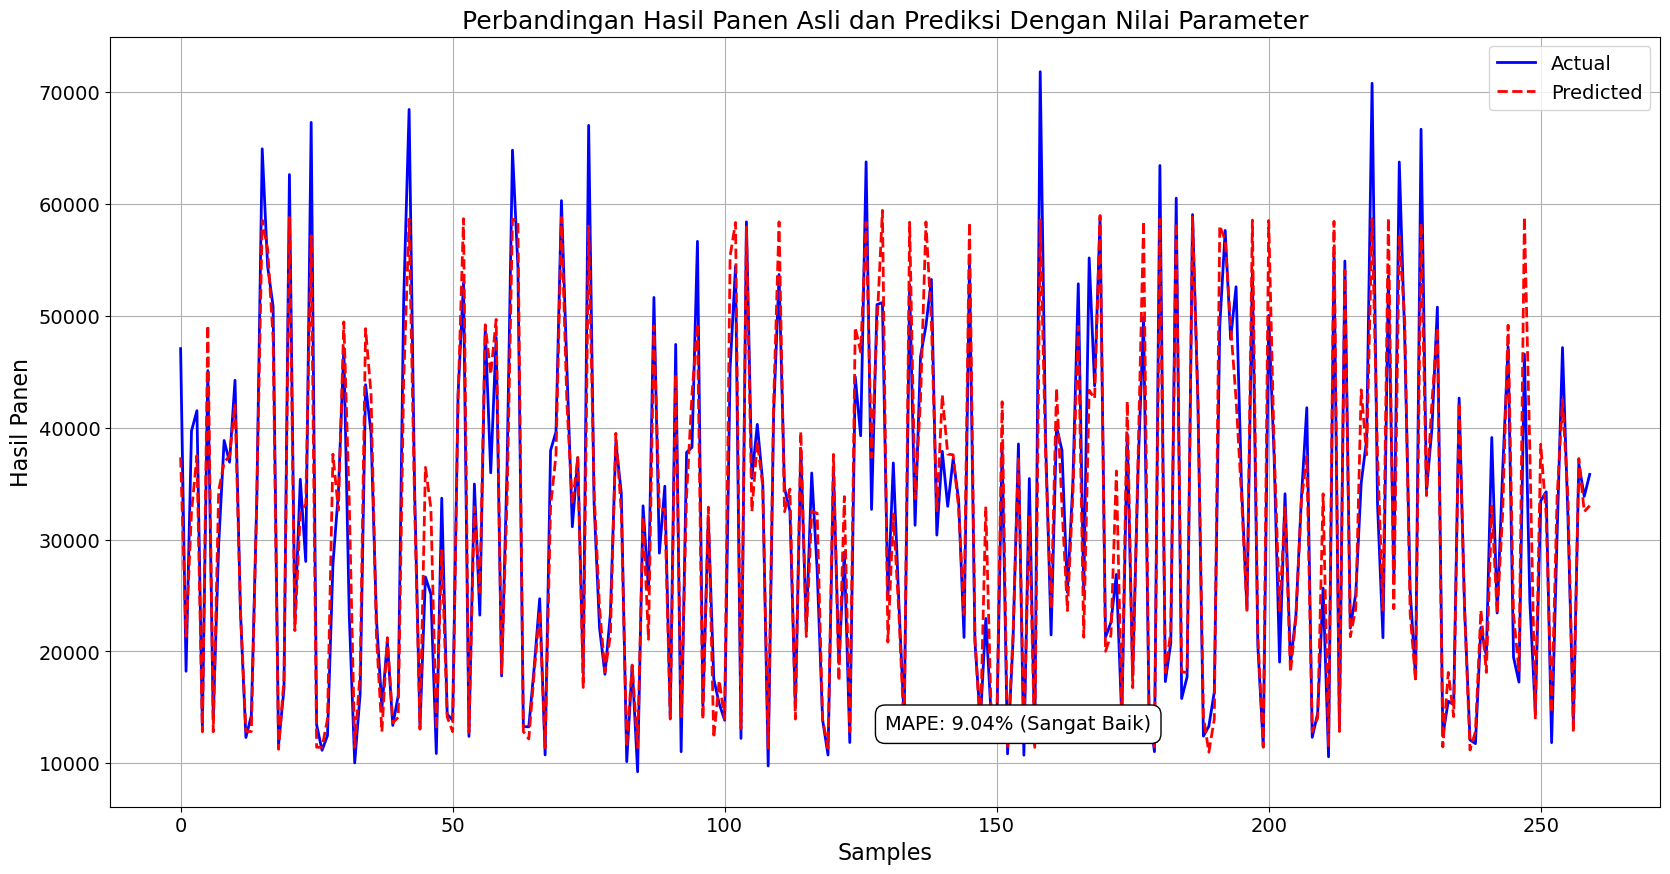

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(comparison_df['Actual'].values, comparison_df['Predicted'].values)

if mape < 10:
    mape_category = "Sangat Baik"
elif mape < 20:
    print('Kategori MAPE: Baik')
elif mape < 30:
    print('Kategori MAPE: Cukup Baik')
elif mape < 50:
    print('Kategori MAPE: Kurang Baik')
else:
    print('Kategori MAPE: Buruk')

plt.figure(figsize=(20, 10))
plt.plot(comparison_df['Actual'].values, label='Actual', color='b', linewidth=2)
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='r', linestyle='--', linewidth=2)
plt.xlabel('Samples', fontsize=16)
plt.ylabel('Hasil Panen', fontsize=16)
plt.title('Perbandingan Hasil Panen Asli dan Prediksi Dengan Nilai Parameter', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Menambahkan MAPE dan kategorinya
plt.text(0.5, 0.1, f'MAPE: {mape:.2f}% ({mape_category})', fontsize=14, color='black', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

In [144]:
new_data = pd.DataFrame({
    'luas_panen': [2928],
    'bibit': [1],
    'pupuk_npk': [2],
    'pupuk_urea': [2],
    'obat_insectisida': [9],
})

In [145]:
prediksi_hasil_panen = rf_best.predict(new_data)
print(f"Prediksi hasil panen untuk data baru: {prediksi_hasil_panen[0]}")

Prediksi hasil panen untuk data baru: 16784.206694942048


# Melakukan perbandingan Random Forest yang memakai parameter terbaik dengan Random Forest yang tidak memakai parameter

In [147]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred_model = model.predict(X_test)

# Evaluasi model terbaik
mae = mean_absolute_error(y_test, y_pred_model)
print(f'Mean Absolute Error: {mae}')
mse = mean_squared_error(y_test, y_pred_model)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
r2 = r2_score(y_test, y_pred_model)
print(f'R2 Score: {r2}')
# Calculate Mean Absolute Percentage Error (MAPE) manually
y_test_nonzero = y_test[y_test != 0]  # Avoid division by zero
y_pred_model_nonzero = y_pred_model[y_test != 0]
mape = np.mean(np.abs((y_test_nonzero - y_pred_model_nonzero) / y_test_nonzero)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')

# Kategorisasi MAPE (contoh kategorisasi)
if mape < 10:
    print('Kategori MAPE: Sangat Baik')
elif mape < 20:
    print('Kategori MAPE: Baik')
elif mape < 30:
    print('Kategori MAPE: Cukup Baik')
elif mape < 50:
    print('Kategori MAPE: Kurang Baik')
else:
    print('Kategori MAPE: Buruk')

Mean Absolute Error: 3361.0476687179485
Mean Squared Error: 22737131.219858404
RMSE: 4768.34680155066
R2 Score: 0.9082931610835219
Mean Absolute Percentage Error: 10.465179009414385%
Kategori MAPE: Baik


In [148]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_model})

Kategori MAPE: Baik


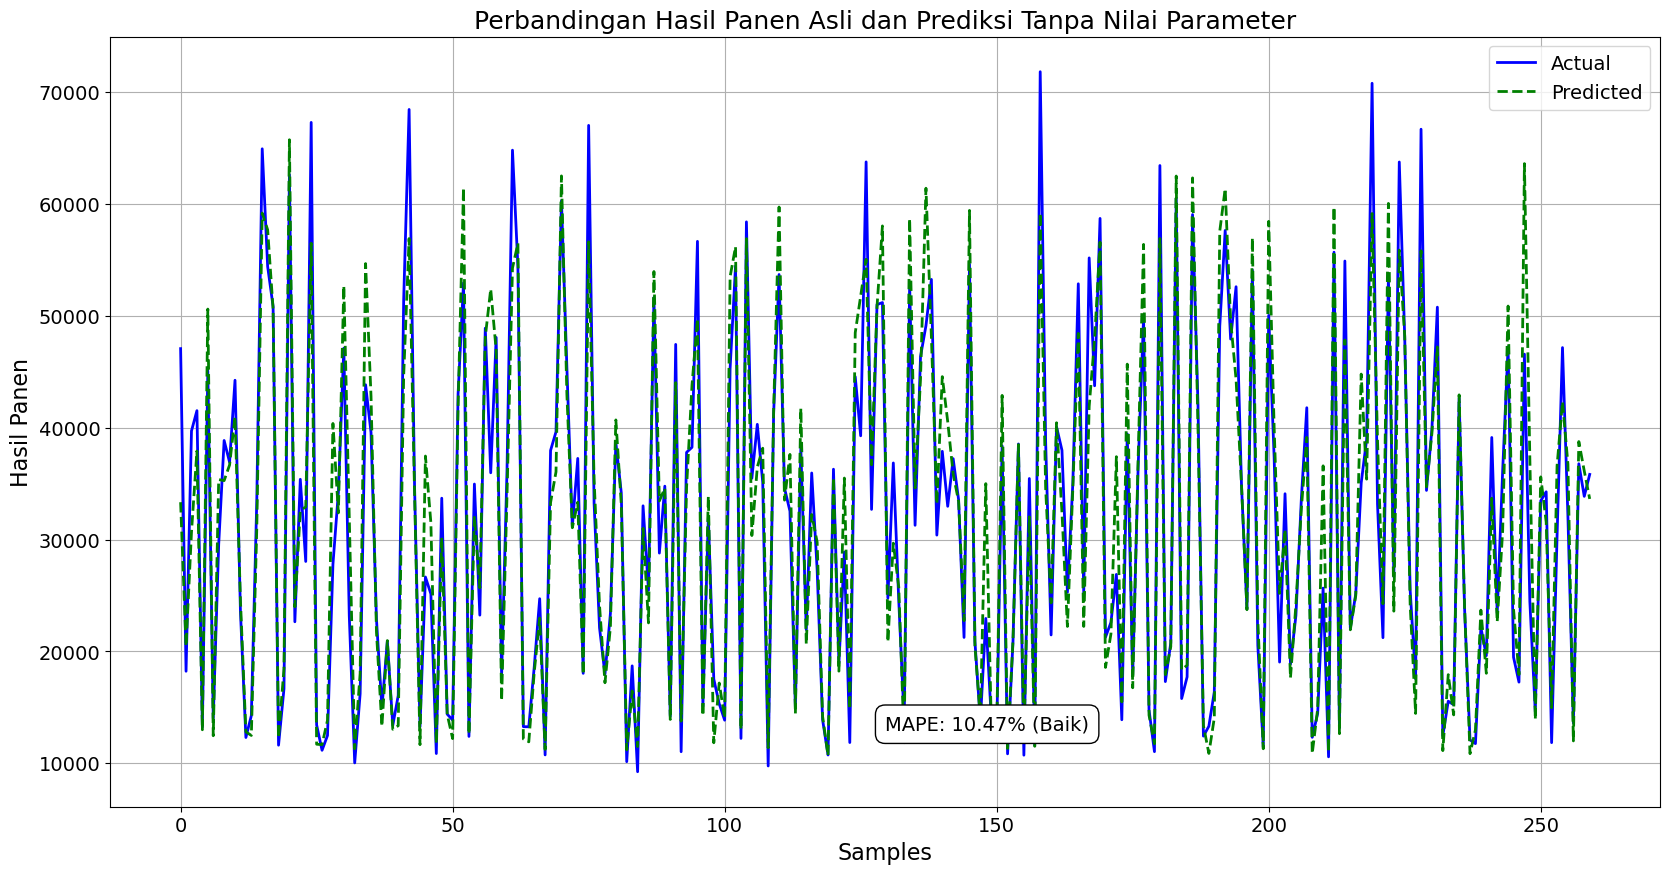

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(comparison_df['Actual'].values, comparison_df['Predicted'].values)

# Menentukan kategori MAPE
if mape < 10:
    mape_category = 'Sangat Baik'
elif mape < 20:
    mape_category = 'Baik'
elif mape < 30:
    mape_category = 'Cukup Baik'
elif mape < 50:
    mape_category = 'Kurang Baik'
else:
    mape_category = 'Buruk'

print(f'Kategori MAPE: {mape_category}')

# Membuat plot
plt.figure(figsize=(20, 10))
plt.plot(comparison_df['Actual'].values, label='Actual', color='b', linewidth=2)
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='g', linestyle='--', linewidth=2)
plt.xlabel('Samples', fontsize=16)
plt.ylabel('Hasil Panen', fontsize=16)
plt.title('Perbandingan Hasil Panen Asli dan Prediksi Tanpa Nilai Parameter', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Menambahkan MAPE dan kategorinya
plt.text(0.5, 0.1, f'MAPE: {mape:.2f}% ({mape_category})', fontsize=14, color='black', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


In [150]:
new_data = pd.DataFrame({
    'luas_panen': [6724],
    'bibit': [1],
    'pupuk_npk': [2],
    'pupuk_urea': [1],
    'obat_insectisida': [5],
})

In [151]:
prediksi_hasil_panen = model.predict(new_data)
print(f"Prediksi hasil panen untuk data baru: {prediksi_hasil_panen[0]}")

Prediksi hasil panen untuk data baru: 33699.71


# Melakukan Perbandingan menggunakan Decision Tree Regresi

In [153]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=5,
                            min_samples_leaf=1,
                            min_samples_split=8,
                            random_state=42)

clf.fit(X_train, y_train)

y_pred_clf = clf.predict(X_test)

# Evaluasi model DecisionTreeRegressor
mae_clf = mean_absolute_error(y_test, y_pred_clf)
print(f'Mean Absolute Error: {mae_clf}')
mse_clf = mean_squared_error(y_test, y_pred_clf)
print(f'Mean Squared Error: {mse_clf}')
rmse_clf = np.sqrt(mse_clf)
print(f'RMSE: {rmse_clf}')
r2_clf = r2_score(y_test, y_pred_clf)
print(f'R2 Score: {r2_clf}')

# Menghitung Mean Absolute Percentage Error (MAPE) secara manual
y_test_nonzero = y_test[y_test != 0]  # Menghindari pembagian dengan nol
y_pred_clf_nonzero = y_pred_clf[y_test != 0]
mape_clf = np.mean(np.abs((y_test_nonzero - y_pred_clf_nonzero) / y_test_nonzero)) * 100
print(f'Mean Absolute Percentage Error: {mape_clf}%')

# Kategorisasi MAPE (contoh kategorisasi)
if mape_clf < 10:
    print('Kategori MAPE: Sangat Baik')
elif mape_clf < 20:
    print('Kategori MAPE: Baik')
elif mape_clf < 30:
    print('Kategori MAPE: Cukup Baik')
elif mape_clf < 50:
    print('Kategori MAPE: Kurang Baik')
else:
    print('Kategori MAPE: Buruk')

Mean Absolute Error: 2967.4043834284216
Mean Squared Error: 18049609.32341066
RMSE: 4248.483179137074
R2 Score: 0.9271995838559579
Mean Absolute Percentage Error: 9.377590081822847%
Kategori MAPE: Sangat Baik


In [154]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_clf})

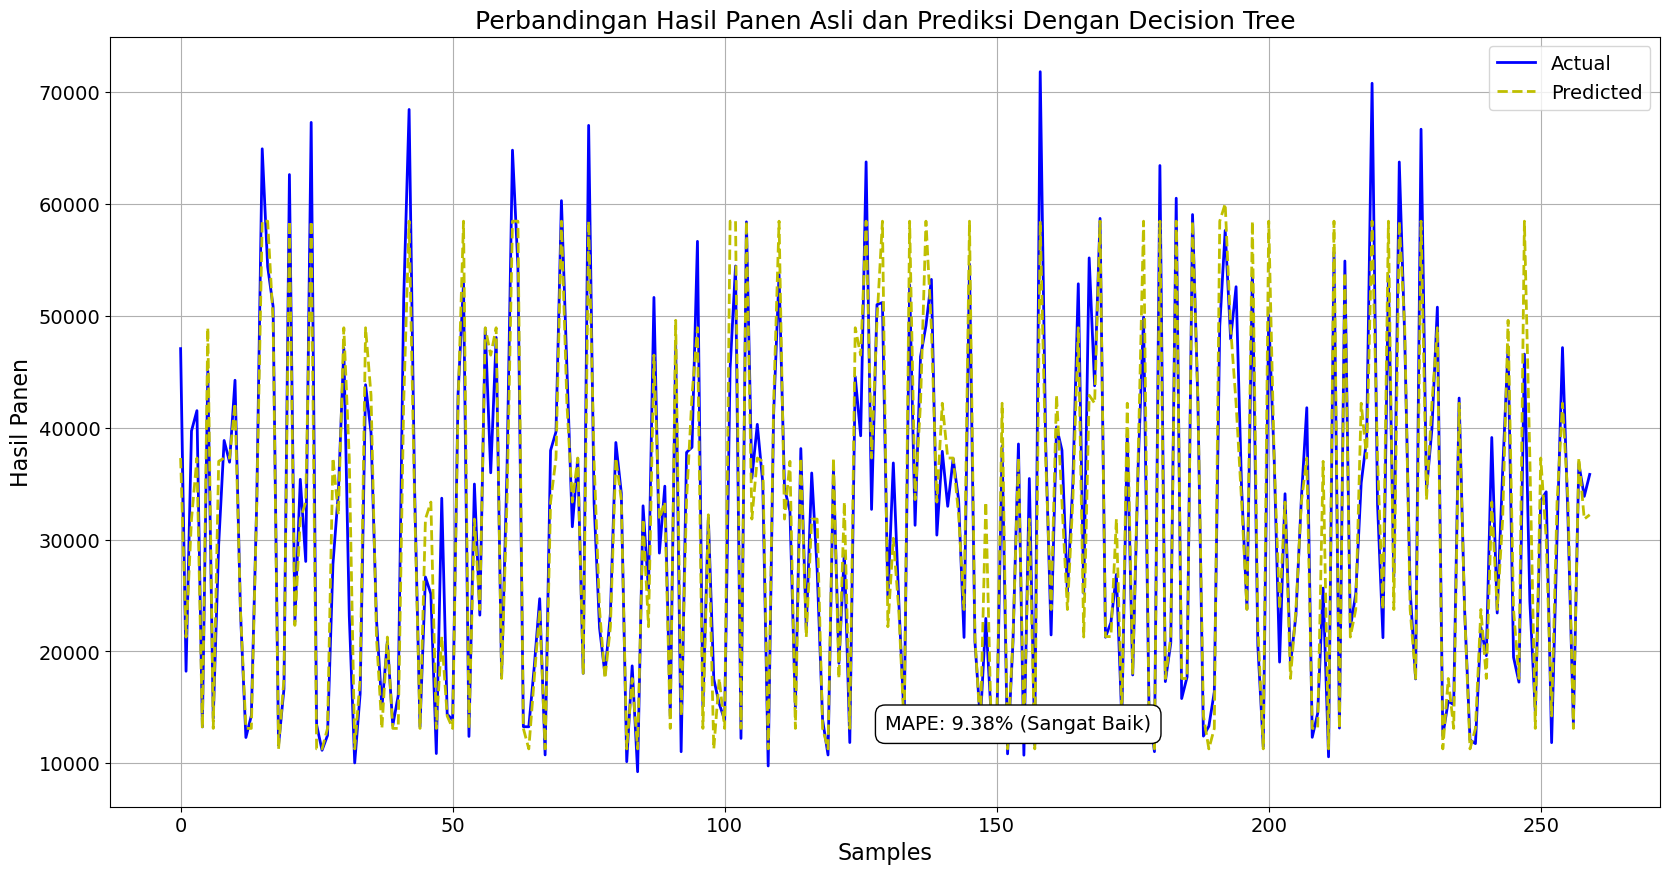

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Menghitung MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(comparison_df['Actual'].values, comparison_df['Predicted'].values)

# Menentukan kategori MAPE
if mape < 10:
    mape_category = "Sangat Baik"
elif mape < 20:
    print('Kategori MAPE: Baik')
elif mape < 30:
    print('Kategori MAPE: Cukup Baik')
elif mape < 50:
    print('Kategori MAPE: Kurang Baik')
else:
    print('Kategori MAPE: Buruk')

# Membuat plot
plt.figure(figsize=(20, 10))
plt.plot(comparison_df['Actual'].values, label='Actual', color='b', linewidth=2)
plt.plot(comparison_df['Predicted'].values, label='Predicted', color='y', linestyle='--', linewidth=2)
plt.xlabel('Samples', fontsize=16)
plt.ylabel('Hasil Panen', fontsize=16)
plt.title('Perbandingan Hasil Panen Asli dan Prediksi Dengan Decision Tree', fontsize=18)
plt.legend(fontsize=14)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Menambahkan MAPE dan kategorinya
plt.text(0.5, 0.1, f'MAPE: {mape:.2f}% ({mape_category})', fontsize=14, color='black', transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

In [156]:
new_data = pd.DataFrame({
    'luas_panen': [2928],
    'bibit': [1],
    'pupuk_npk': [2],
    'pupuk_urea': [2],
    'obat_insectisida': [9],
})

In [157]:
prediksi_hasil_panen = clf.predict(new_data)
print(f"Prediksi hasil panen untuk data baru: {prediksi_hasil_panen[0]}")

Prediksi hasil panen untuk data baru: 18044.6875


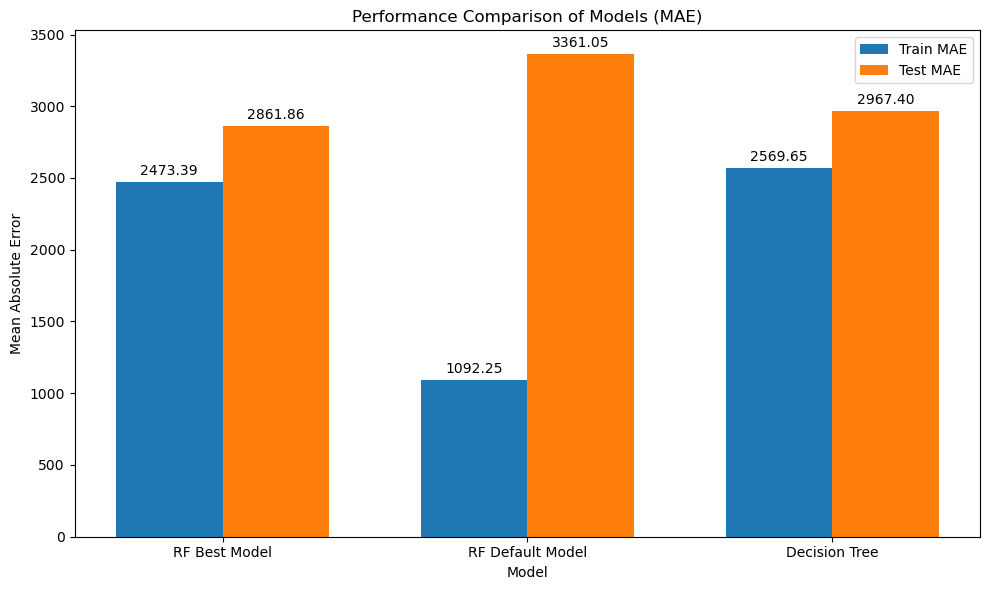

In [161]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# Data yang diperlukan: y_train, y_test, y_pred_train_best, y_pred_best, y_pred_train_model, y_pred_model, y_pred_train_clf, y_pred_clf
# Misalnya, kita akan menggunakan Mean Absolute Error (MAE) sebagai metrik performansi
y_pred_train_best = rf_best.predict(X_train)
y_pred_train_model = model.predict(X_train)
y_pred_train_clf = clf.predict(X_train)

# Menghitung MAE untuk masing-masing model
mae_best_train = mean_absolute_error(y_train, y_pred_train_best)
mae_best_test = mean_absolute_error(y_test, y_pred_best)
mae_model_train = mean_absolute_error(y_train, y_pred_train_model)
mae_model_test = mean_absolute_error(y_test, y_pred_model)
mae_clf_train = mean_absolute_error(y_train, y_pred_train_clf)
mae_clf_test = mean_absolute_error(y_test, y_pred_clf)

# Plot performansi untuk masing-masing model
labels = ['RF Best Model', 'RF Default Model', 'Decision Tree']
train_mae = [mae_best_train, mae_model_train, mae_clf_train]
test_mae = [mae_best_test, mae_model_test, mae_clf_test]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot untuk MAE pada data training dan test
rects1 = ax.bar(x - width/2, train_mae, width, label='Train MAE')
rects2 = ax.bar(x + width/2, test_mae, width, label='Test MAE')

# Menambahkan teks dan label
ax.set_xlabel('Model')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Performance Comparison of Models (MAE)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Menambahkan label nilai di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label di atas bar
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


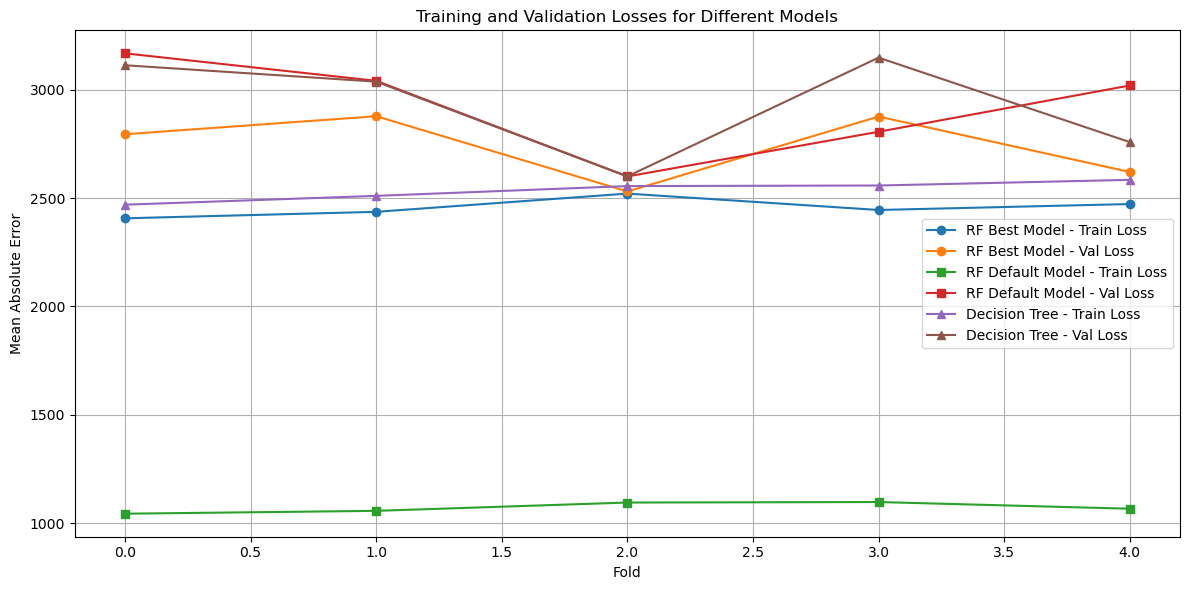

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# Memuat dataset
data = pd.read_csv('datasetTugasAkhir.csv')

# Memisahkan fitur (X) dan target (y)
X = data.drop(columns='hasil_panen').values  # Ganti 'target_column_name' dengan nama kolom target Anda
y = data['hasil_panen'].values  # Ganti 'target_column_name' dengan nama kolom target Anda

# Fungsi untuk menghitung training dan validation loss menggunakan K-Fold cross-validation
def calculate_losses(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    train_losses = []
    val_losses = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        train_loss = mean_absolute_error(y_train, y_train_pred)
        val_loss = mean_absolute_error(y_val, y_val_pred)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    
    return train_losses, val_losses

# Model yang digunakan
rf_best = RandomForestRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=8, n_estimators=88, random_state=42)
rf_default = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=8, random_state=42)

# Menghitung losses
rf_best_train_losses, rf_best_val_losses = calculate_losses(rf_best, X, y)
rf_default_train_losses, rf_default_val_losses = calculate_losses(rf_default, X, y)
dt_train_losses, dt_val_losses = calculate_losses(dt, X, y)

# Plot losses
plt.figure(figsize=(12, 6))

plt.plot(rf_best_train_losses, label='RF Best Model - Train Loss', marker='o')
plt.plot(rf_best_val_losses, label='RF Best Model - Val Loss', marker='o')

plt.plot(rf_default_train_losses, label='RF Default Model - Train Loss', marker='s')
plt.plot(rf_default_val_losses, label='RF Default Model - Val Loss', marker='s')

plt.plot(dt_train_losses, label='Decision Tree - Train Loss', marker='^')
plt.plot(dt_val_losses, label='Decision Tree - Val Loss', marker='^')

plt.xlabel('Fold')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation Losses for Different Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
